### Capítulo 4: Treinando Modelos lineares

Neste capítulo estudaremos o funcionamento interno dos modelos. Aprenderemos como funcionam as regressões lineares, tanto calculando "na mão" quanto usando gradiente descendente para convergir para o resultado. Também estudaremos a regressão logística e a regressão softmax, que são dois modelos usados comumente em machine learning.

### Regressao linear
A regresao linear é um modelo que faz uma previsão calculando uma soma ponderada das features com um termo independente chamado de coeficiente linear ou viés.


Para treinar um modelo de regressão linear precisamos encontrar o valor dos parâmetros que melhor se ajuste ao conjunto de treinamento. Para isso, **precisamos de uma função de perda** que nos permita saber o quão perto ou longe estamos desse ajuste. Normalmente usamos a medida de erro quadrático médio (RMSE). Assim, treinar uma regressão linear é encontrar os parâmetros que minimizem a RMSE. 


#### Equação normal

Existe um cálculo matemático (a "forma fechada") para encontrar esses parâmetros.  Faremos aqui a implementação dela.

In [1]:
# vamos gerar valores a partir de uma função e ruído
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4+3 * X + np.random.randn(100,1)

#aqui A e B da equação são 3 e 4. O ruído é proposital para atrapalhar.

In [2]:
X_b = np.c_[np.ones((100,1)),X] # adiciona 1 no X0 em todas as instâncias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.79906727],
       [2.93396972]])

Achou o 3 e o 4 (arredondando, lembrando que tem ruído). Vamos fazer previsões e plotá-las num gráfico:

In [4]:
#realizando predições

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict 

array([[3.79906727],
       [9.66700671]])

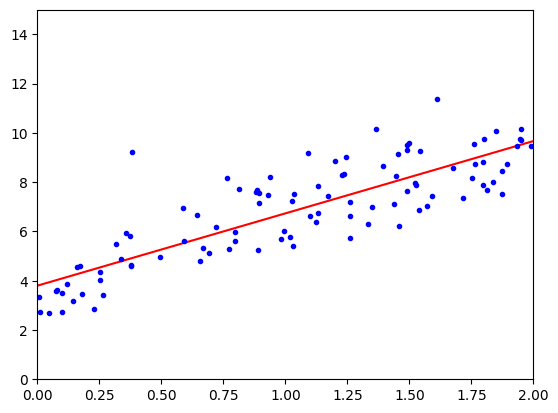

In [5]:
#plotar as predições
plt.plot(X_new, y_predict, "r-", label="previsão do modelo")
plt.plot(X,y, "b.", label = "dados")
plt.axis([0,2,0,15])
plt.show()

O modelo é a linha vermelha. Ele traduz bem os dados. Agora vamos usar o Sklearn para fazer a mesma coisa.

In [6]:
#agora com sklearn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.79906727]), array([[2.93396972]]))

E as previsões:

In [7]:
lin_reg.predict(X_new)

array([[3.79906727],
       [9.66700671]])

Os resultados são iguais.

#### Complexidade computacional

A complexidade computacional desse método (inclusive do sklearn) é O(n^2) - o que significa que dobrar o número de features faz com que o tempo de treinamento seja multiplicado por quatro. Precisamos então de um método de **aproximação** que chegue em um resultado praticamente igual mas com uma fração do custo computacional. Esse método existe: é o gradiente descendente.

#### Gradiente desdendente

O gradiente descendente é um algoritmo de otmização que encontra soluções ótimas para um monte de problemas. Seu funcionamento consiste em navegar pelo espaço de solução de modo a buscar o ponto de menor erro ou perda. Isso é feito interativamente percorrendo esse espaço e percebendo onde há subidas e descidas até que encontre um buraco muito fundo. Nem todas as soluções são ótimas: é possível encontrar um buraco intermediário que acabe impedindo que o algoritmo saia de lá e assim não encontre a solução definitiva. O nome disso é mínimo local. Algumas técnicas de treino permitem evitar esses mínimos, como modular o tamanho do passo que o algoritmo dá para que consiga pular esse mínimo, por exemplo.

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [9]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.79459976]), array([2.96359815]))

Na prática os mesmos coeficientes da forma fechada.

#### Protegendo contra overfiting: regularização para restringir os modelos e melhorar a generalização

Podemos aplicar restrições nos modelos para que eles favoreçam a generalização e portanto combatam o overfiting. Nos modelos lineares temos algumas como Ridge, lasso e elastic net.

#### Regressão Ridge

O algoritmo é forçado a manter os pesos o menor possível.

In [10]:
 from sklearn.linear_model import Ridge

 ridge_reg = Ridge(alpha=1, solver ='cholesky') #alpha 0 é uma regressão linear normal, alto mantém os pesos próximos a zero
 ridge_reg.fit(X,y)
 ridge_reg.predict([[1.5]])

array([[8.16269827]])

In [12]:
sgd_reg = SGDRegressor(penalty="l2") #Se usarmos a penalização L2 então aplica a regularização Ridge
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/home/edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8.27824005])

#### Regressão Lasso

A regularização Lasso é quase uma forma de feature selection porque tende a suprimir os pesos das features menos importantes. É a penalidade L1.

In [13]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.06913919])

In [14]:
sgd_reg = SGDRegressor(penalty="l1") #Se usarmos a penalização L2 então aplica a regularização Ridge
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/home/edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8.28546091])